# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Coinbase Acquires Fairx Exchange to Make Derivatives Market Approachable for Millions of Retail Customers.  Nasdaq-listed cryptocurrency exchange Coinbase has acquired a regulated derivatives trading platform. Coinbase plans to make the derivatives market more approachable to millions of its retail customers. Coinbase Plans to Offer Crypto Derivatives to All US Customers Nasdaq-listed crypto exchange operator Coinbase announced Wednesday that it has acquired Fairx, a regulated derivatives trading platform. Fairx is [&#8230;] ... [| Skaityti daugiau](https://news.bitcoin.com/coinbase-acquires-fairx-exchange-make-derivatives-market-approachable-millions-of-retail-customers/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Novak Djokovic: Unanswered questions over Australian Covid saga.  Novak Djokovic is facing a number of questions over his activities after testing positive for Covid. ... [| Skaityti daugiau](http://www.bbc.co.uk/news/world-australia-59977198) 

### Kainų kaita pandemijos metu

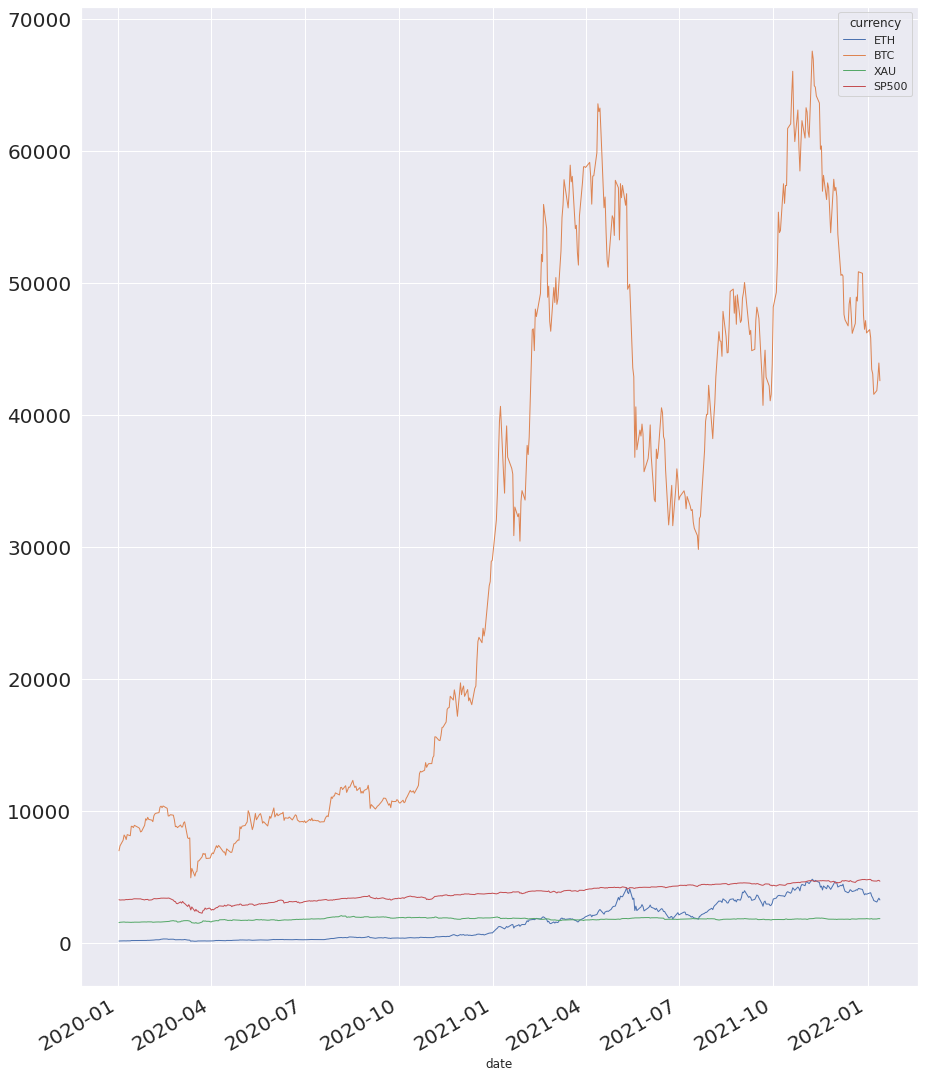

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.903462,0.151624,0.917112
BTC,0.903462,1.000000,0.134887,0.875147
XAU,0.151624,0.134887,1.000000,0.298441
SP500,0.917112,0.875147,0.298441,1.000000


In [8]:
#hide ### Koreliacijos matrica.

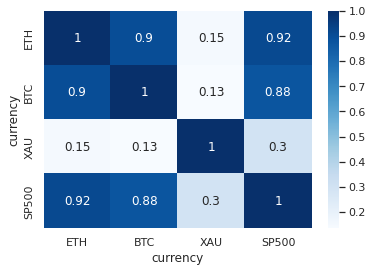

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')